In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [ ]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9, out_features=3):
   super().__init__()
   self.fc1 = nn.Linear(in_features, h1)
   self.fc2 = nn.Linear(h1, h2)
   self.out = nn.Linear(h2, out_features)

  def forward(self,x):
   x = F.relu(self.fc1(x))
   x = F.relu(self.fc2(x))
   x = self.out(x)

   return x

In [ ]:
torch.manual_seed(32)
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

In [ ]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
X = my_df.drop('species',axis=1)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = my_df['species']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: species, Length: 150, dtype: float64

In [ ]:
X = X.values
y = y.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.9000, 2.5000, 4.5000, 1

In [ ]:
y_test

tensor([1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0,
        0, 1, 0, 2, 0, 0])

In [ ]:
y_train

tensor([1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2,
        1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0,
        0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2,
        0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1,
        2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred,y_train)

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f'Epochs:{i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epochs:0 and loss: 1.169895887374878
Epochs:10 and loss: 0.9578844308853149
Epochs:20 and loss: 0.7988812923431396
Epochs:30 and loss: 0.634953498840332
Epochs:40 and loss: 0.44043004512786865
Epochs:50 and loss: 0.291716992855072
Epochs:60 and loss: 0.1782905012369156
Epochs:70 and loss: 0.11587590724229813
Epochs:80 and loss: 0.08928150683641434
Epochs:90 and loss: 0.07743766158819199


Text(0.5, 0, 'epoch')

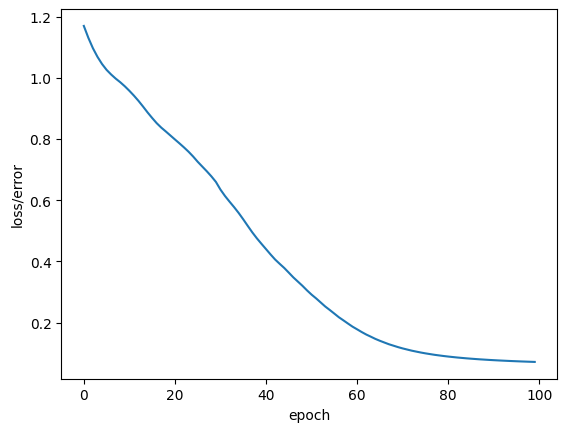

In [ ]:
#garp it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)


In [ ]:
loss

tensor(0.0539)

In [ ]:
y_eval

tensor([[ -3.3580,   3.9452,   0.3616],
        [  7.5862,   1.1113, -11.3861],
        [  6.6288,   1.5092, -10.4603],
        [ -3.3304,   4.2647,   0.0569],
        [ -7.3705,   2.8135,   5.1481],
        [ -7.3749,   3.9061,   4.2781],
        [  6.2304,   1.6527, -10.0543],
        [  6.8783,   1.4056, -10.7016],
        [ -2.6728,   4.3138,  -0.6444],
        [  7.2201,   1.3890, -11.1494],
        [ -3.8269,   4.4110,   0.5165],
        [ -8.6886,   1.9990,   6.9012],
        [ -2.0605,   3.8275,  -0.7672],
        [ -1.0676,   4.3809,  -2.2975],
        [ -7.5000,   2.6230,   5.3318],
        [ -8.6214,   1.5491,   7.1280],
        [ -3.7724,   3.6503,   0.9422],
        [ -6.7624,   2.7791,   4.5289],
        [ -1.6978,   4.2047,  -1.4772],
        [  7.8104,   1.3824, -11.9435],
        [  6.9175,   1.5954, -10.9322],
        [ -9.4323,   2.7058,   7.2346],
        [ -5.7703,   3.0159,   3.3488],
        [  6.7894,   1.3532, -10.5322],
        [  6.8259,   1.0698, -10.3167],


In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.)  {y_val} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.)  tensor([-3.3580,  3.9452,  0.3616]) 	 1
2.)  tensor([  7.5862,   1.1113, -11.3861]) 	 0
3.)  tensor([  6.6288,   1.5092, -10.4603]) 	 0
4.)  tensor([-3.3304,  4.2647,  0.0569]) 	 1
5.)  tensor([-7.3705,  2.8135,  5.1481]) 	 2
6.)  tensor([-7.3749,  3.9061,  4.2781]) 	 2
7.)  tensor([  6.2304,   1.6527, -10.0543]) 	 0
8.)  tensor([  6.8783,   1.4056, -10.7016]) 	 0
9.)  tensor([-2.6728,  4.3138, -0.6444]) 	 1
10.)  tensor([  7.2201,   1.3890, -11.1494]) 	 0
11.)  tensor([-3.8269,  4.4110,  0.5165]) 	 1
12.)  tensor([-8.6886,  1.9990,  6.9012]) 	 2
13.)  tensor([-2.0605,  3.8275, -0.7672]) 	 1
14.)  tensor([-1.0676,  4.3809, -2.2975]) 	 1
15.)  tensor([-7.5000,  2.6230,  5.3318]) 	 2
16.)  tensor([-8.6214,  1.5491,  7.1280]) 	 2
17.)  tensor([-3.7724,  3.6503,  0.9422]) 	 1
18.)  tensor([-6.7624,  2.7791,  4.5289]) 	 2
19.)  tensor([-1.6978,  4.2047, -1.4772]) 	 1
20.)  tensor([  7.8104,   1.3824, -11.9435]) 	 0
21.)  tensor([  6.9175,   1.5954, -10.9322]) 	 0
22.)  tensor([-9.4323,

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])


In [ ]:
with torch.no_grad():
 print(model(new_iris))

tensor([  6.9155,   1.2532, -10.6096])


In [ ]:
torch.save(model.state_dict(),'Iris_Model.pt')

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Model.pt'))

<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)